# Práctica 2 - Aprendizaje Automático (Perceptrón)

## Introducción

Se debe realizar un reconocedor de números escritos a mano (un OCR de números). Para ello, se asume hecha la
parte de visión computacional (detección de texto en la imagen, recorte de caracteres y normalización de la imagen) y
nuestro data set contendrá ejemplos de números con un formato de imágenes de 8 x 8 píxeles (que se vectoriza
en un vector de 64 posiciones con un recorrido de la imagen por filas desde la esquina superior izquierda)
donde el valor de cada píxel está dentro del rango 0 (negro) - 16 (blanco).

Por tanto, hacer el reconocedor de caracteres es lo mismo que dada una nueva imagen recortada, clasificar
esta imagen en la clase correspondiente al número, es decir, tendremos 10 clases, del “0” al “9”.

#### Dataset

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

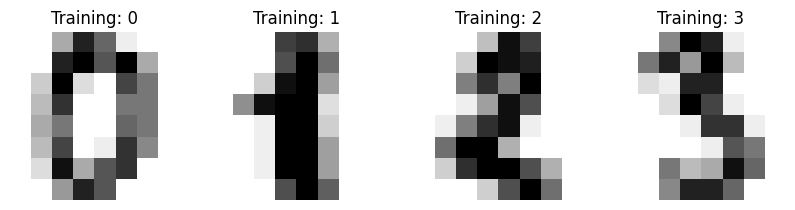

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#Se dividen los datos del dataset, el 50% para entrenamiento (X_train, y_train) 
#y el otro 50% para los test (X_test,y_test)
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=42,shuffle=False
)

#### Entrenament

In [4]:
#Se crear el clasificadro con el modelo lineal del perceptron y seguidamente se entrena
clf = Perceptron(tol=1e-9, random_state=42)
clf.fit(X_train, y_train)

Perceptron(random_state=42, tol=1e-09)

#### Predicción

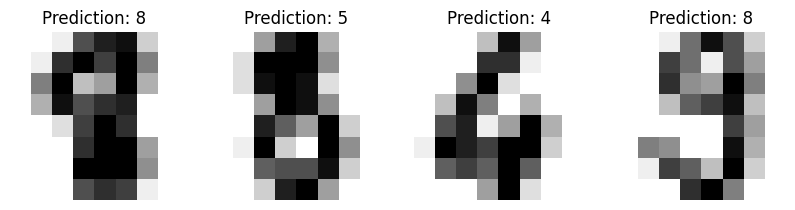

In [5]:
# Se hace la predicción de los datos para testear
predicted = clf.predict(X_test)

#Se muestran algunos resultados
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier Perceptron(random_state=42, tol=1e-09):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        88
           1       0.79      0.92      0.85        91
           2       1.00      0.95      0.98        86
           3       0.97      0.80      0.88        91
           4       0.99      0.90      0.94        92
           5       0.76      0.98      0.86        91
           6       0.92      0.99      0.95        91
           7       0.96      0.88      0.92        89
           8       0.88      0.78      0.83        88
           9       0.91      0.85      0.88        92

    accuracy                           0.90       899
   macro avg       0.91      0.90      0.90       899
weighted avg       0.91      0.90      0.90       899




Confusion matrix:
[[83  0  0  0  1  1  3  0  0  0]
 [ 0 84  0  1  0  2  0  0  1  3]
 [ 3  0 82  1  0  0  0  0  0  0]
 [ 0  3  0 73  0  9  0  1  4  1]
 [ 1  2  0  0 83  0  4  0  0  2]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  3  0  0  0  7  0 78  0  1]
 [ 1 11  0  0  0  7  0  0 69  0]
 [ 4  2  0  0  0  2  0  2  4 78]]


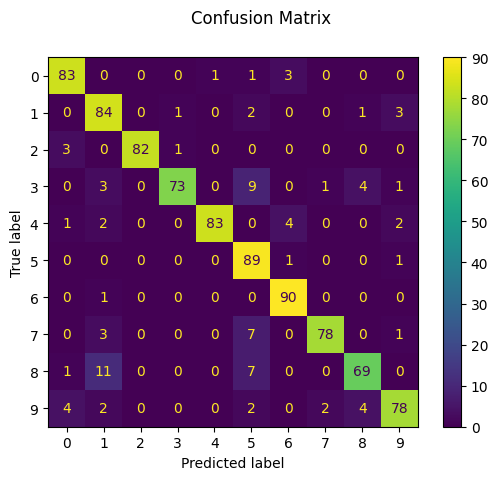

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [8]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        88
           1       0.79      0.92      0.85        91
           2       1.00      0.95      0.98        86
           3       0.97      0.80      0.88        91
           4       0.99      0.90      0.94        92
           5       0.76      0.98      0.86        91
           6       0.92      0.99      0.95        91
           7       0.96      0.88      0.92        89
           8       0.88      0.78      0.83        88
           9       0.91      0.85      0.88        92

    accuracy                           0.90       899
   macro avg       0.91      0.90      0.90       899
weighted avg       0.91      0.90      0.90       899




#### Razonamiento y Resultados obtenidos